# Web of Science - Fighting words analysis

### Load wos_econ, wos_soc and join them


In [1]:
import sys
sys.path.append("./../helper") # find scripts
maxInt = sys.maxsize

from common_imports import *
from helpers import *

#from load_data import wos_soc, wos_econ   # web of science
from load_constellate import wos_soc, wos_econ # constellate

import convokit
from convokit import FightingWords
from convokit import Corpus, Utterance, Speaker

import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

C:\Users\benja\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
wos = wos_econ+wos_soc

### Create convokit corpuses by decade

In [5]:
tstart = 1901
corpuses = [] # container to save corpuses by decade

while tstart<=2011:
    
    utterances = [] # container to save utterances by decade
    
    tend=tstart+9 # last year of decade
    
    
    articles_dec = [article for article in wos if tryInt(article['year']) in range(tstart, tend)]
        
    for article in articles_dec:
        utterances.append( Utterance(id=str(article['id']), conversation_id=str(article['id']), text=article['title'], speaker=Speaker(id=str(article['author'])), meta={'discipline': article['discipline']}) )
    
    corpuses.append( Corpus(utterances=utterances) )   
        
    
    tstart+=10 # go to next decade

In [6]:
len(corpuses)

12

In [7]:
corpuses[0].random_utterance() # random article from first decade
corpuses[0].get_utterances_dataframe().head() # dataframe of articles from first decade

Utterance({'obj_type': 'utterance', 'meta': {'discipline': 'econ'}, 'vectors': [], 'speaker': Speaker({'obj_type': 'speaker', 'meta': {}, 'vectors': [], 'owner': None, 'id': ''}), 'conversation_id': '94147', 'reply_to': None, 'timestamp': None, 'text': 'rationale discounted bonus premiums', 'owner': <convokit.model.corpus.Corpus object at 0x0000027D21A11160>, 'id': '94147'})

,timestamp,text,speaker,reply_to,conversation_id,meta.discipline,vectors
id,,,,,,,
29706,None,educational intelligence,,None,29706,econ,[]
29983,None,editorial,,None,29983,econ,[]
30016,None,front matter,,None,30016,econ,[]
30087,None,editorial notes,,None,30087,econ,[]
30881,None,closing exercise,,None,30881,econ,[]


### Fighting words analysis by decade

In [8]:
fw = []
fw_sum = []
for i, corpus in enumerate(corpuses):
    print(i)
    fw.append( FightingWords(ngram_range=(1,1)) )
    fw[i].fit(corpus, class1_func=lambda utt: utt.meta['discipline'] == 'soc',
                      class2_func=lambda utt: utt.meta['discipline'] == 'econ')
    fw_sum.append( fw[i].summarize(corpus, plot=False, class1_name='soc', class2_name='econ')  ) 

0
Initializing default CountVectorizer with ngram_range (1, 1)... Done.
class1_func returned 446 valid corpus components. class2_func returned 1623 valid corpus components.
Vocab size is 168
Comparing language...
ngram zscores computed.


1
Initializing default CountVectorizer with ngram_range (1, 1)... Done.
class1_func returned 543 valid corpus components. class2_func returned 3439 valid corpus components.
Vocab size is 316
Comparing language...
ngram zscores computed.


2
Initializing default CountVectorizer with ngram_range (1, 1)... Done.
class1_func returned 714 valid corpus components. class2_func returned 4755 valid corpus components.
Vocab size is 411
Comparing language...
ngram zscores computed.


3
Initializing default CountVectorizer with ngram_range (1, 1)... Done.
class1_func returned 852 valid corpus components. class2_func returned 8211 valid corpus components.
Vocab size is 648
Comparing language...
ngram zscores computed.


4
Initializing default CountVectorizer with ngram_range (1, 1)... Done.
class1_func returned 1124 valid corpus components. class2_func returned 9199 valid corpus components.
Vocab size is 735
Comparing language...
ngram zscores computed.


5
Initializing default CountVectorizer with ngram_range (1, 1)... Done.
class1_func returned 1374 valid corpus components. class2_func returned 12639 valid corpus components.
Vocab size is 989
Comparing language...
ngram zscores computed.


6
Initializing default CountVectorizer with ngram_range (1, 1)... Done.
class1_func returned 1970 valid corpus components. class2_func returned 18922 valid corpus components.
Vocab size is 1417
Comparing language...
ngram zscores computed.


7
Initializing default CountVectorizer with ngram_range (1, 1)... Done.
class1_func returned 3349 valid corpus components. class2_func returned 31751 valid corpus components.
Vocab size is 2223
Comparing language...
ngram zscores computed.


8
Initializing default CountVectorizer with ngram_range (1, 1)... Done.
class1_func returned 3944 valid corpus components. class2_func returned 40623 valid corpus components.
Vocab size is 2918
Comparing language...
ngram zscores computed.


9
Initializing default CountVectorizer with ngram_range (1, 1)... Done.
class1_func returned 4350 valid corpus components. class2_func returned 46057 valid corpus components.
Vocab size is 3387
Comparing language...
ngram zscores computed.


10
Initializing default CountVectorizer with ngram_range (1, 1)... Done.
class1_func returned 4571 valid corpus components. class2_func returned 50370 valid corpus components.
Vocab size is 4132
Comparing language...
ngram zscores computed.


11
Initializing default CountVectorizer with ngram_range (1, 1)... Done.
class1_func returned 3087 valid corpus components. class2_func returned 37092 valid corpus components.
Vocab size is 3607
Comparing language...
ngram zscores computed.


### Descriptives

In [9]:
fw_sum[0][fw_sum[0]['z-score'].between(-2, 2)]

,z-score,class
ngram,,
economic,-1.861193,econ
school,-1.686917,econ
foreign,-1.654052,econ
united,-1.524753,econ
trade,-1.498238,econ
...,...,...
front,1.654495,soc
society,1.818154,soc
wales,1.936761,soc


In [10]:
fw[0].get_top_k_ngrams(15)

(['plague',
  'medical',
  'social',
  'abroad',
  'work',
  'parliament',
  'philanthropy',
  'charities',
  'nursing',
  'fever',
  'editorials',
  'child',
  'indian',
  'reports',
  'family'],
 ['article',
  'review',
  'insurance',
  'industries',
  'home',
  'economic',
  'school',
  'foreign',
  'united',
  'trade',
  'city',
  'prices',
  'economics',
  'tariff',
  'theory'])

### Plot selected z-scores across time

In [11]:
def pltZ(fw, word):
    yrs=np.linspace(start=1900, stop=2020, num=12).astype(np.int32)
    p = plt.plot(yrs, [tryInt(scores.get_zscore(word), flt=True) for scores in fw]);
    p = plt.axhline(y=0, color='r', linestyle='-');
    p = plt.ylabel("econ <---> soc");
    return(p)

Text(0, 0.5, 'econ <---> soc')

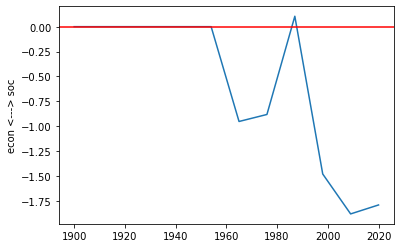

In [16]:
pltZ(fw, "inequality")

In [13]:
# eof